/opt/conda/lib/python3.6/site-packages/numpy/lib/index_tricks.py:787: ComplexWarning: Casting complex values to real discards the imaginary part
  a.flat[:end:step] = val
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


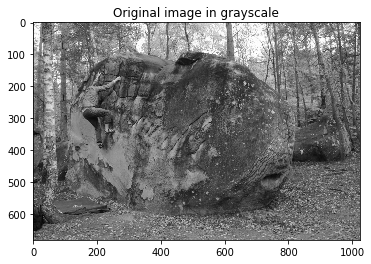

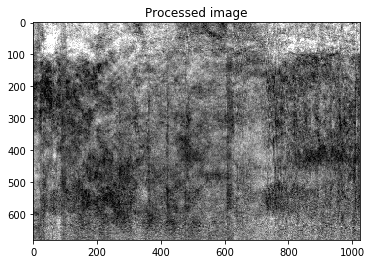

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import image_analysis as ima               #Library that we wrote
from scipy.linalg import eig

image = plt.imread('Boulder_image.jpg')    #Import the image

A, gray_image = ima.rgb_to_gray(image)     #Turn it to grayscale such that we can perform matrix operations with it
W = np.dot(A,A.transpose())                #Calculate A*A.trans and A.trans*A and call them W and Wv, respectively
Wv = np.dot(A.transpose(),A)

W_eigenvalues, U = eig(W)                  #Find the eigenvectors and eigenvalues of W and Wv, these should be positive
Wv_eigenvalues, V = eig(Wv)

S_entries = np.sqrt(W_eigenvalues)         #Take the square root of the eigenvalues, this should give real numbers
S = np.zeros_like(A)                       #Create an empty array that has the same size as the image, we will fill the diagonal with the eigenvalues. Note that this is not necessarily a square matrix.
np.fill_diagonal(S,S_entries)

SVD_tmp = np.dot(U, S)                     #Calculate SVD
SVD = np.abs(np.dot(SVD_tmp,V.T))          #Take absolute value (Rounding errors?)
resulting_image = ima.matrix_to_image(SVD) #Convert SVD to an RGB (gray) format

plt.figure(1)                              #Display everything
plt.title('Original image in grayscale')
plt.imshow(gray_image)

plt.figure(2)
plt.title('Processed image')
plt.imshow(resulting_image)

